<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Regresi_Diabetes_Learning_Curve_Validation_Curve_Ridge_Residual_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Topik: generalization error (learning curve), model complexity (alpha), residual diagnostics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#  Data
X, y = load_diabetes(return_X_y=True)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#  Pipeline + pencarian alpha (model complexity)
pipe = Pipeline([("scaler", StandardScaler()), ("model", Ridge(random_state=42))])
param_grid = {"model__alpha": np.logspace(-3, 3, 13)}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid.fit(X_tr, y_tr)

best = grid.best_estimator_
y_pred = best.predict(X_te)

rmse = np.sqrt(mean_squared_error(y_te, y_pred))
mae  = mean_absolute_error(y_te, y_pred)
r2   = r2_score(y_te, y_pred)

print("Best alpha:", grid.best_params_["model__alpha"])
print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE : {mae:.3f}")
print(f"Test R^2  : {r2:.3f}")

Best alpha: 31.622776601683793
Test RMSE: 53.493
Test MAE : 42.949
Test R^2  : 0.460


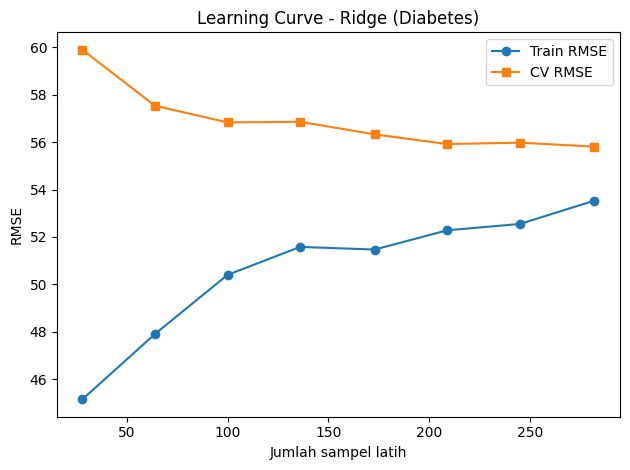

In [6]:
#  Grafik A - Learning Curve (RMSE vs train_size)
train_sizes, train_scores, valid_scores = learning_curve(
    best, X_tr, y_tr, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 8)
)
train_rmse = -train_scores.mean(axis=1)
valid_rmse = -valid_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_rmse, marker="o", label="Train RMSE")
plt.plot(train_sizes, valid_rmse, marker="s", label="CV RMSE")
plt.xlabel("Jumlah sampel latih")
plt.ylabel("RMSE")
plt.title("Learning Curve - Ridge (Diabetes)")
plt.legend()
plt.tight_layout()
plt.show()

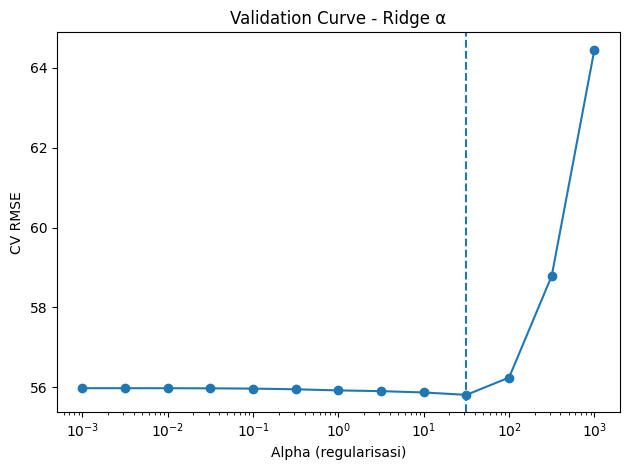

In [7]:
#  Grafik B - Validation Curve (alpha vs CV-RMSE)
alphas = grid.cv_results_["param_model__alpha"].data.astype(float)
cv_rmse = -grid.cv_results_["mean_test_score"]

plt.figure()
plt.semilogx(alphas, cv_rmse, marker="o")
plt.axvline(grid.best_params_["model__alpha"], linestyle="--")
plt.xlabel("Alpha (regularisasi)")
plt.ylabel("CV RMSE")
plt.title("Validation Curve - Ridge α")
plt.tight_layout()
plt.show()

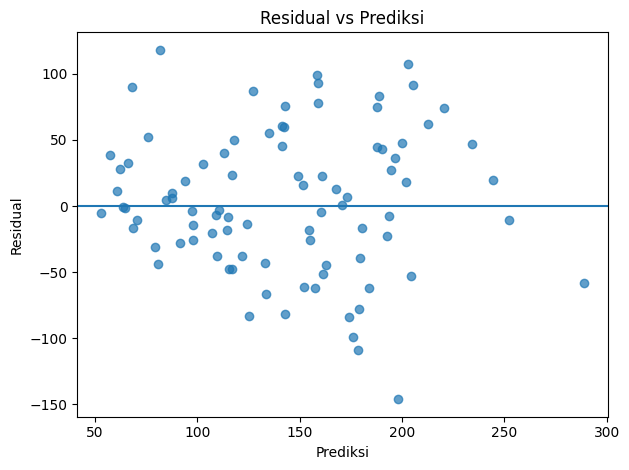

In [8]:
#  Grafik C - Residual vs Prediksi
resid = y_te - y_pred
plt.figure()
plt.scatter(y_pred, resid, alpha=0.7)
plt.axhline(0)
plt.xlabel("Prediksi")
plt.ylabel("Residual")
plt.title("Residual vs Prediksi")
plt.tight_layout()
plt.show()